In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

Regresión lineal de campo con corriente

(20.635731304501153, 0.09710136458570053, 0.0033862895153410157, 0.003337624143793498)


Text(0.5, 102.72222222222219, 'Corriente [A]')

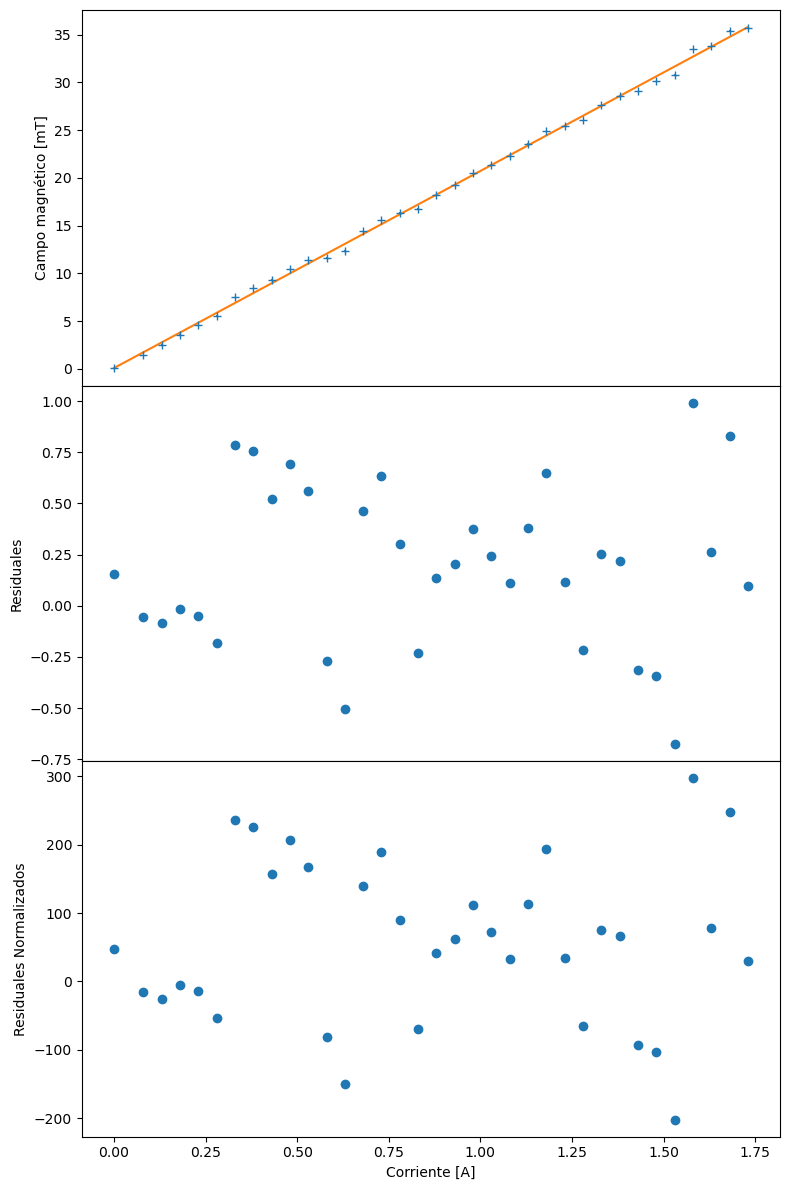

In [58]:
def minimos_cuadrados_incertidumbre(x,y,t,i,name="Regresion",plot = True,Descargar= False):
    w = 1/(i**2)
    sum_w_x_2 = np.sum((x**2)*w)
    sum_w_y = np.sum(w*y)
    sum_w_x = np.sum(w*x)
    sum_w_x_y = np.sum(w*x*y)
    sum_w = np.sum(w)
    delta_prima = (sum_w*sum_w_x_2)-(sum_w_x)**2 
    pendiente = ((sum_w*sum_w_x_y)-(sum_w_x*sum_w_y))/delta_prima
    intercepto = ((sum_w_x_2*sum_w_y)-(sum_w_x*sum_w_x_y))/delta_prima
    error_inter = np.sqrt(sum_w_x_2/delta_prima)
    error_m = np.sqrt(sum_w/delta_prima)
    residuales = y-(pendiente*x)+intercepto
    normalize_residuales = (y-pendiente*x+intercepto)/error_m
    if plot:
        fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True, gridspec_kw={'hspace': 0})
        axs[0].errorbar(x, y,xerr=t, yerr=i, fmt='+')       
        axs[0].plot(x,pendiente*x+intercepto)
        axs[1].scatter(x,residuales)
        axs[2].scatter(x,normalize_residuales)
        axs[0].set_ylabel("Campo magnético [mT]")
        axs[1].set_ylabel('Residuales')
        axs[2].set_ylabel('Residuales Normalizados')
        plt.xlabel('X')
        plt.tight_layout()
        if Descargar:
            ruta = os.getcwd()
            name =name+".png"
            ruta_completa = f"{ruta}/{name}"
            plt.savefig(ruta_completa, bbox_inches='tight', pad_inches=1.0)
    return pendiente,intercepto, error_inter, error_m
#A
x = np.array([0,0.08,0.13, 0.18, 0.23, 0.28,0.33, 0.38, 0.43, 0.48, 0.53, 0.58, 0.63, 0.68, 0.73, 0.78, 0.83, 0.88,0.93, 0.98, 1.03, 1.08, 1.13, 1.18, 1.23, 1.28, 1.33, 1.38, 1.43, 1.48, 1.53, 1.58, 1.63, 1.68, 1.73])
w = np.array(0.001*np.ones(len(x)))
#mT
y = np.array([0.06,1.5,2.5, 3.6, 4.6, 5.5, 7.5,8.5, 9.3, 10.5, 11.4, 11.6, 12.4,14.4, 15.6, 16.3, 16.8, 18.2, 19.3, 20.5, 21.4, 22.3, 23.6, 24.9, 25.4, 26.1, 27.6, 28.6, 29.1, 30.1, 30.8, 33.5, 33.8, 35.4, 35.7])
e = np.array(0.01*np.ones(len(y)))
valores = minimos_cuadrados_incertidumbre(x,y,w,e)
print(valores)
plt.xlabel("Corriente [A]")

In [59]:
def campo(valores,c):
    return valores[0]*c+valores[1]

ni:15
  :15.1
Fe: 
  :15
Cu:15
  :

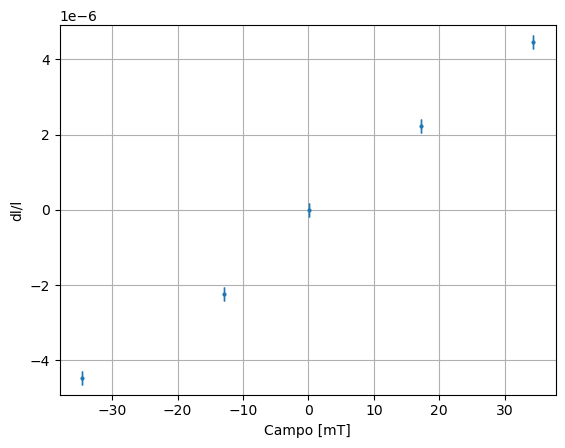

In [75]:
#fe

x = np.array([-1.68,-0.63, 0, 0.83, 1.66])
#-0.23 ,0.06
y = np.array([-2,-1,0, 1, 2 ])
#Cambiar las variables a campo
t = campo(valores, x)
delta = y*670*10**(-9)/(2*0.15)
w = np.array(0.01*np.ones(len(x)))


plt.errorbar(t, delta, xerr=w, fmt='o', linestyle='None', capsize=5, markersize=2)  # Reducción del tamaño del punto
plt.xlabel("Campo [mT]")
plt.ylabel("dl/l")
plt.title("")
plt.grid(True)  # Añade una cuadrícula al gráfico para mejor visualización
plt.show()

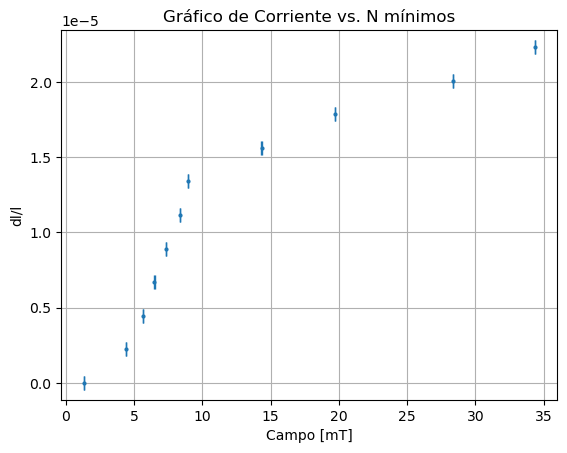

In [73]:

# Datos
x = np.array([0.06, 0.21, 0.27, 0.31, 0.35, 0.4, 0.43, 0.69, 0.95, 1.37, 1.66]) 
y = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
w = np.array(0.01 * np.ones(len(x)))  # Error en x

#cambiar valores

t = campo(valores, x)
delta = y*670*10**(-9)/(2*0.15)

plt.errorbar(t, delta, xerr=w, fmt='o', linestyle='None', capsize=5, markersize=2)  # Reducción del tamaño del punto
plt.xlabel("Campo [mT]")
plt.ylabel("dl/l")
plt.title("Gráfico de Corriente vs. N mínimos")
plt.grid(True)  # Añade una cuadrícula al gráfico para mejor visualización
plt.show()
